In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("smr.csv",decimal=",")
df

,Symbol,SMR Rating,sales_growth_last_qtr,sales_growth_one_qtr_ago,sales_growth_two_qtr_ago,mrgEbit_dez21,mrgEbit_dez22,mrgEbit_recente,mrgLiq_growth_last_qtr,mrgLiq_growth_one_qtr_ago,mrgLiq_growth_two_qtr_ago,roe_dez21,roe_dez22,roe_recente
0,VMW,A,6,5,1,21,16,14,-13,-20,-42,22,26,106
1,WMG,B,9,2,-8,12,13,13,-9,-60,-29,386,216,185
2,RRR,A,-1,8,1,25,34,37,134,-14,-16,108,949,917
3,CRT,B,-16,100,61,90,94,95,2,8,3,124,377,448
4,KMB,B,1,2,0,13,13,12,-81,5,43,230,273,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,APPF,C,25,29,30,-3,-15,-8,-50,90,1041,0,-24,-18
1542,PUMP,C,38,50,42,-8,0,10,-187,62,-146,-6,0,13
1543,OKTA,C,25,33,37,-53,-50,-33,-61,-52,-31,-21,-16,-11
1544,VSAT,D,15,-5,-9,2,-4,-5,218,-5937,1019,1,-5,24


In [3]:
df = df.drop(["Symbol"],axis = 1)
df

,SMR Rating,sales_growth_last_qtr,sales_growth_one_qtr_ago,sales_growth_two_qtr_ago,mrgEbit_dez21,mrgEbit_dez22,mrgEbit_recente,mrgLiq_growth_last_qtr,mrgLiq_growth_one_qtr_ago,mrgLiq_growth_two_qtr_ago,roe_dez21,roe_dez22,roe_recente
0,A,6,5,1,21,16,14,-13,-20,-42,22,26,106
1,B,9,2,-8,12,13,13,-9,-60,-29,386,216,185
2,A,-1,8,1,25,34,37,134,-14,-16,108,949,917
3,B,-16,100,61,90,94,95,2,8,3,124,377,448
4,B,1,2,0,13,13,12,-81,5,43,230,273,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,C,25,29,30,-3,-15,-8,-50,90,1041,0,-24,-18
1542,C,38,50,42,-8,0,10,-187,62,-146,-6,0,13
1543,C,25,33,37,-53,-50,-33,-61,-52,-31,-21,-16,-11
1544,D,15,-5,-9,2,-4,-5,218,-5937,1019,1,-5,24


In [4]:
secret_original_df = df.copy()
def get_original_df() -> pd.DataFrame:
    return secret_original_df.copy()

# Exploratory Data Analysis

In [5]:
rating_counts = df['SMR Rating'].value_counts()
print(rating_counts)

SMR Rating
B    585
C    418
A    303
D    198
E     42
Name: count, dtype: int64


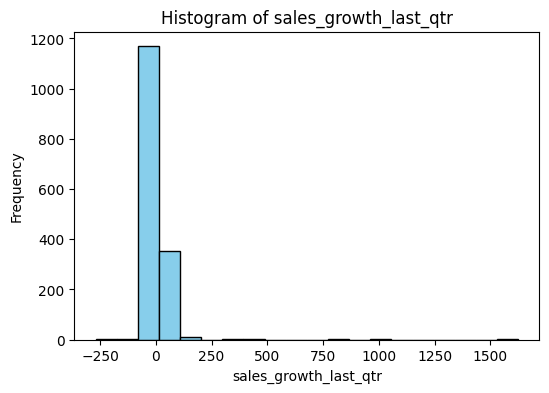

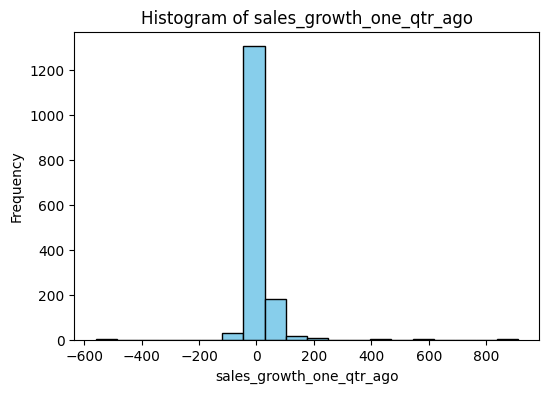

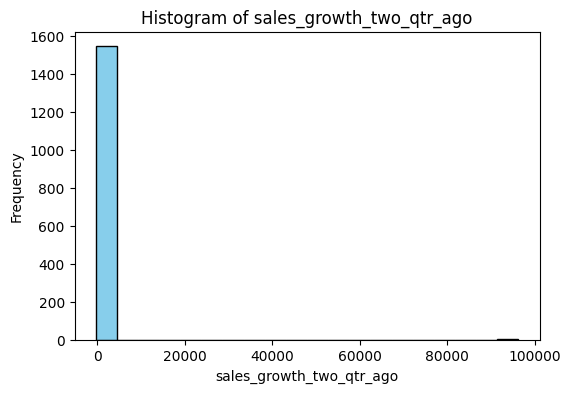

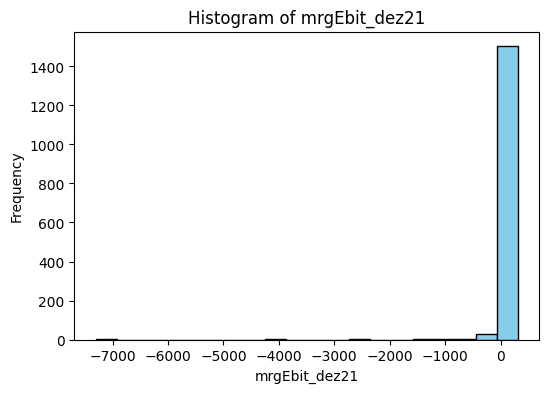

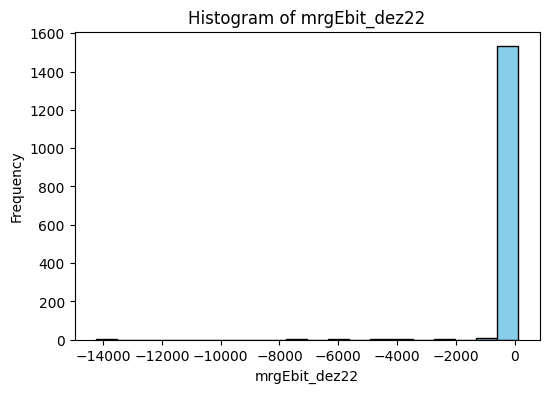

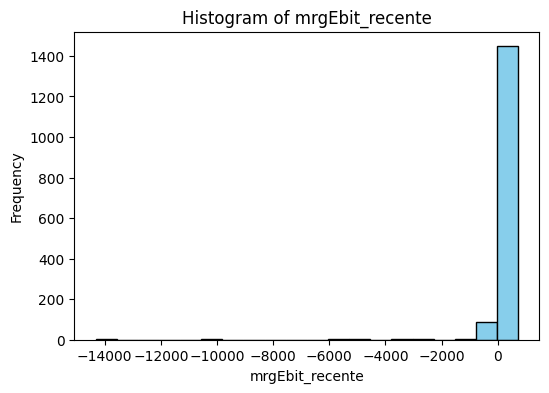

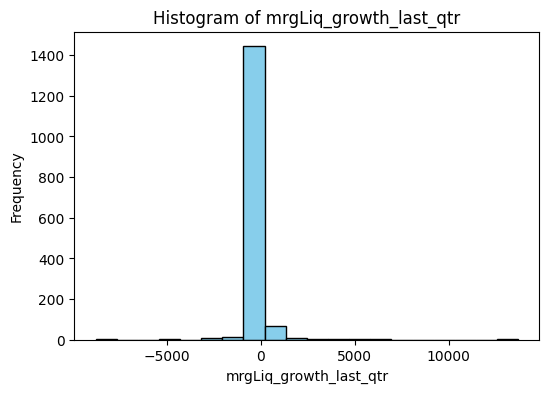

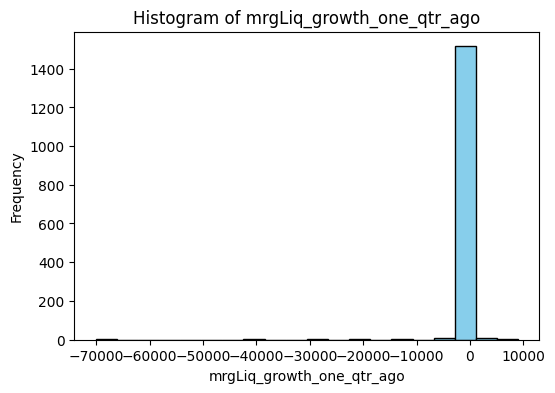

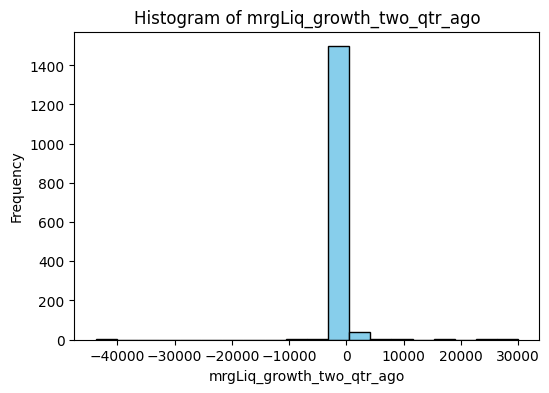

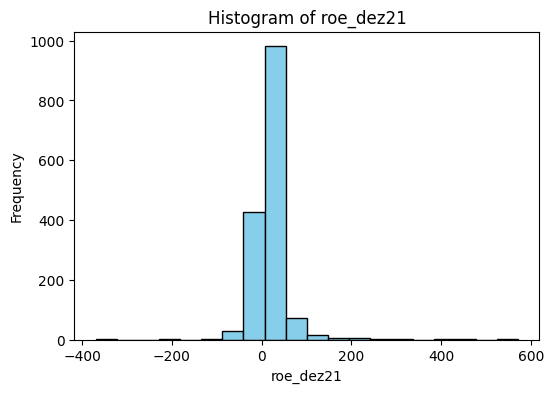

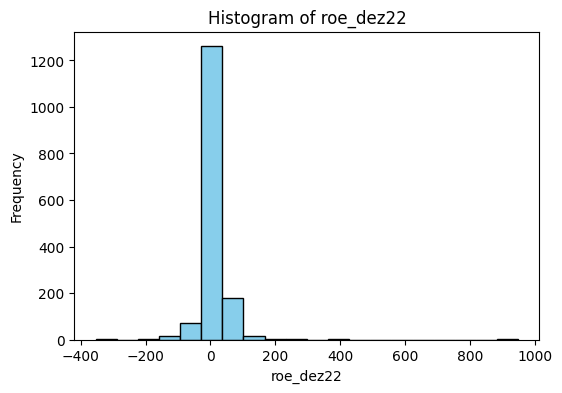

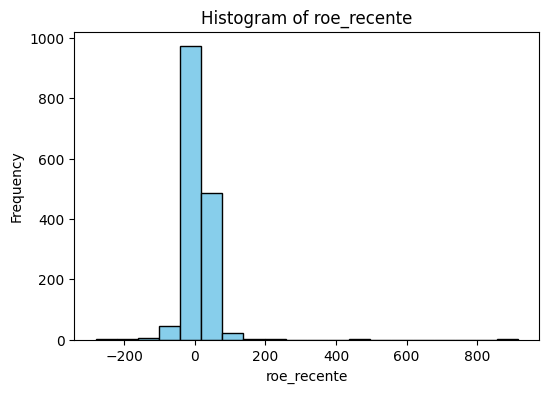

In [6]:
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


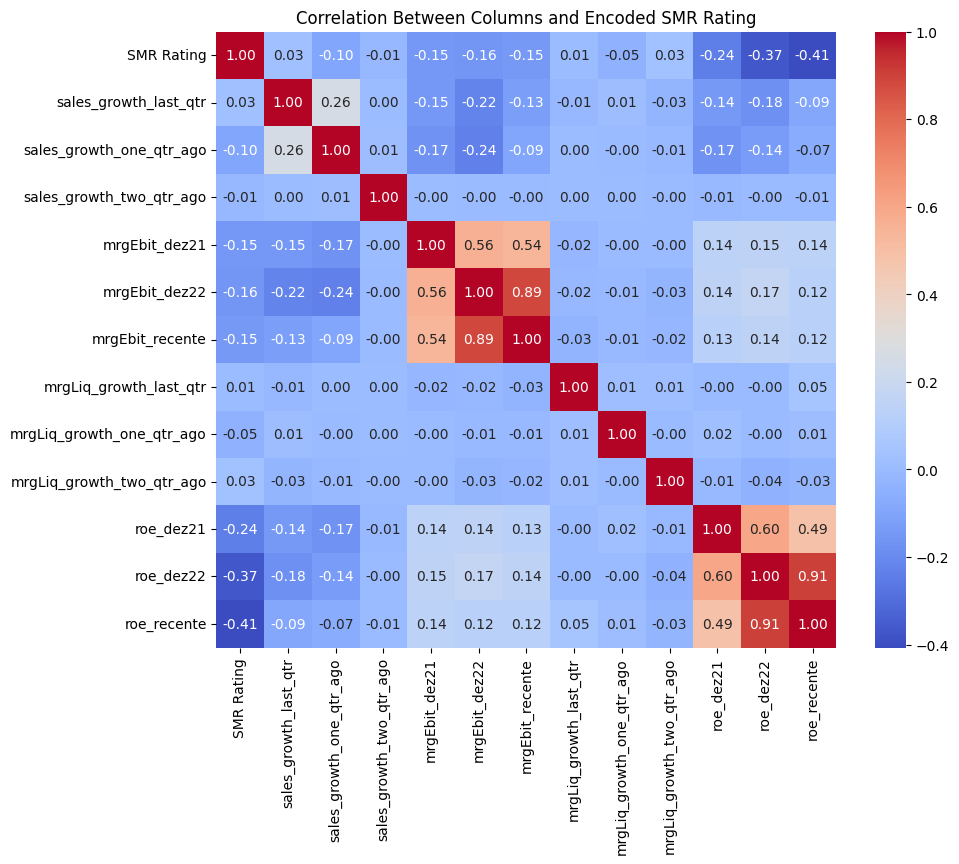

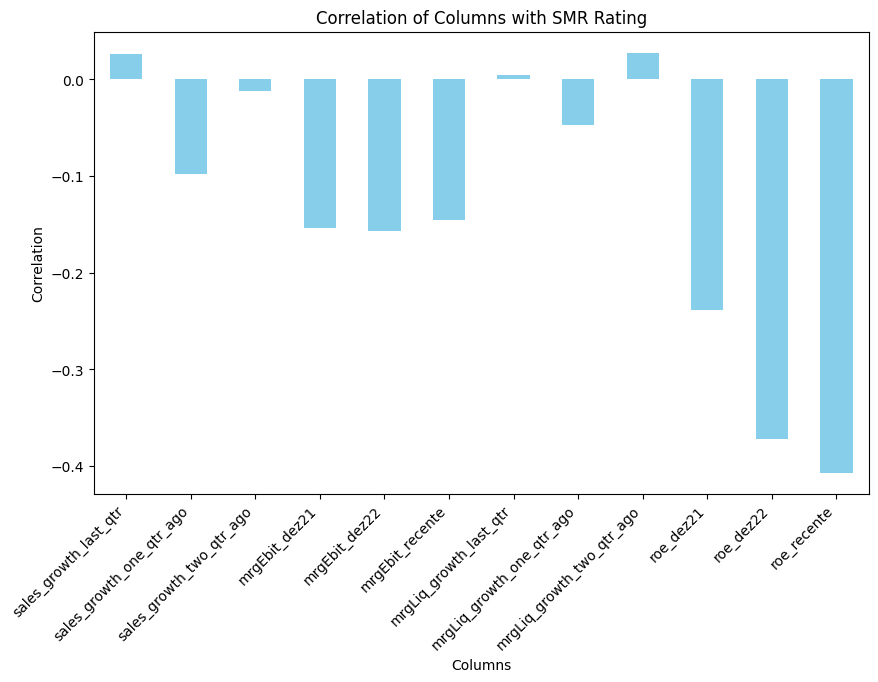

In [8]:
df = get_original_df()

import seaborn as sns
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['SMR Rating'] = label_encoder.fit_transform(df['SMR Rating'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Columns and Encoded SMR Rating')
plt.show()

# Calculate correlations between each column and 'SMR Rating Encoded'
correlations_with_rating = correlation_matrix['SMR Rating']

# Plot a bar chart
plt.figure(figsize=(10, 6))
correlations_with_rating.drop('SMR Rating').plot(kind='bar', color='skyblue')
plt.title('Correlation of Columns with SMR Rating')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data Cleaning

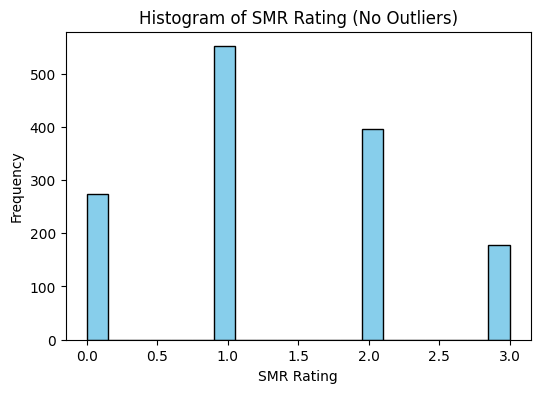

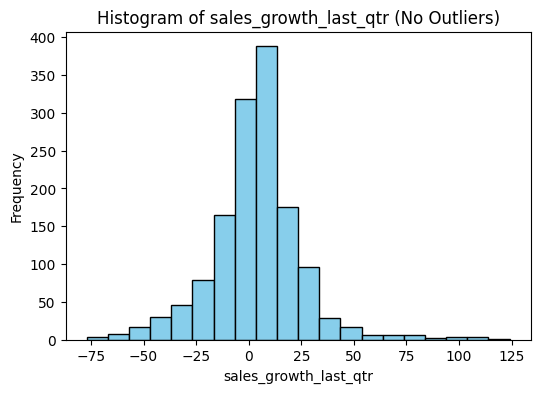

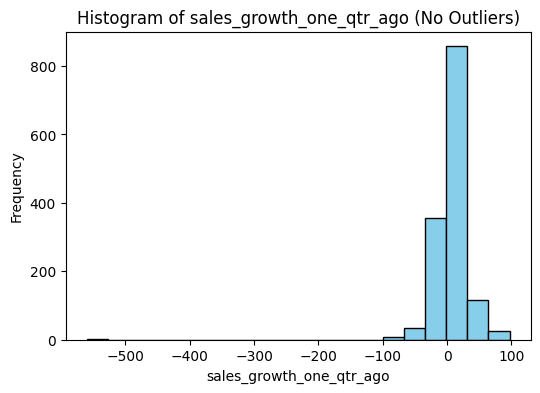

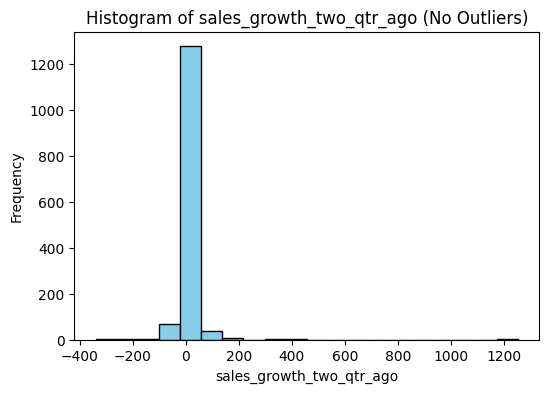

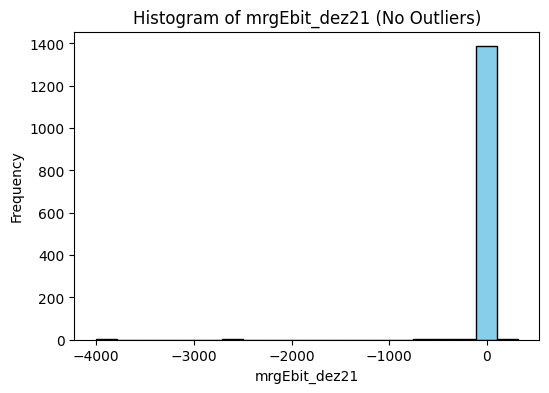

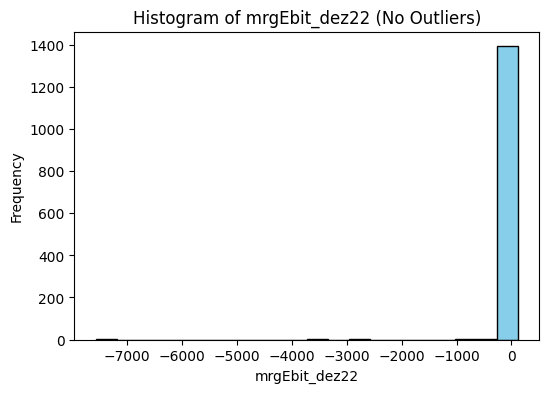

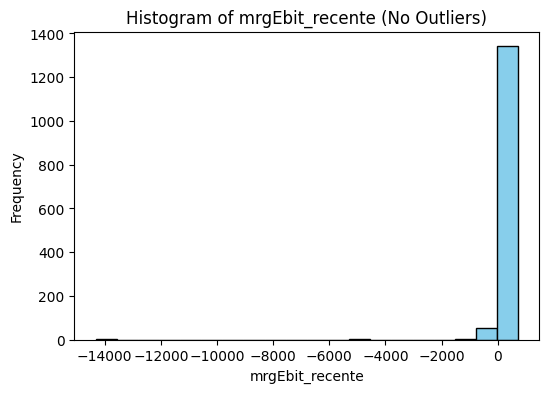

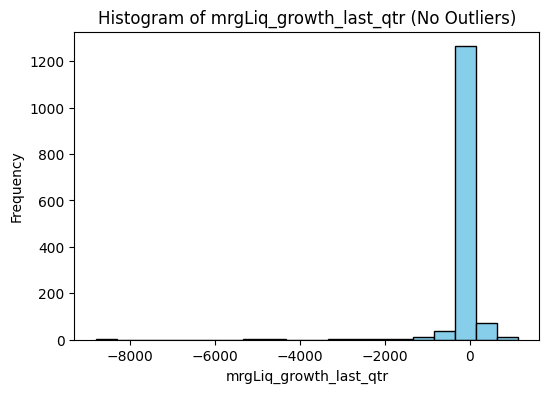

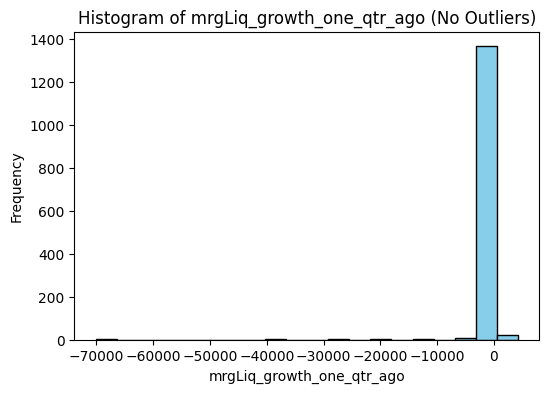

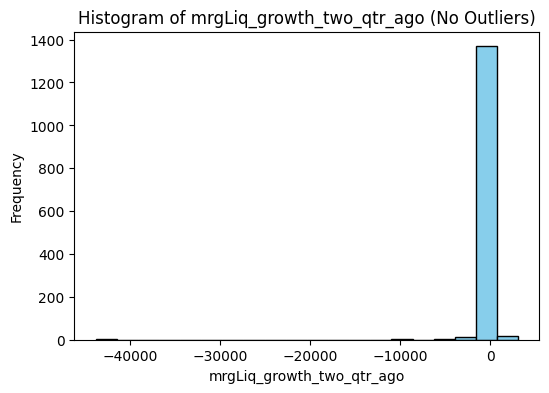

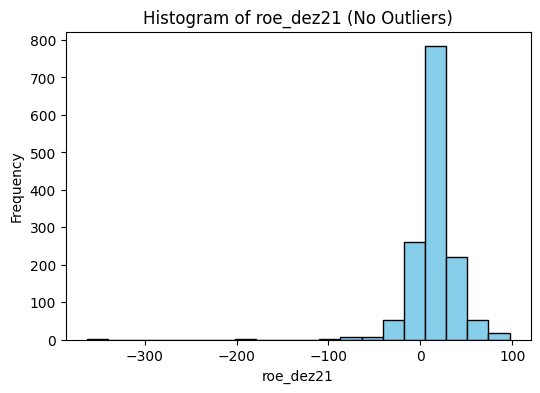

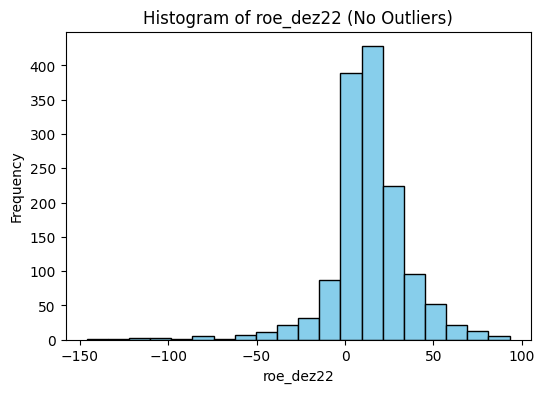

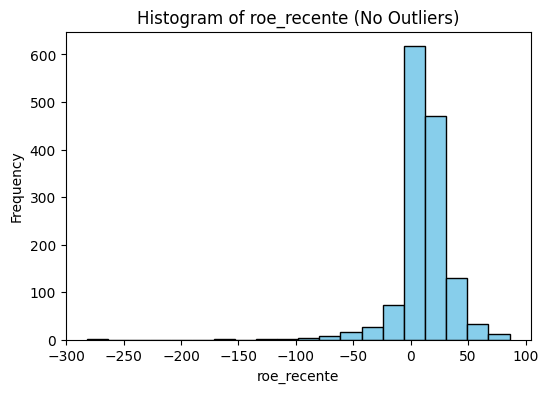

In [9]:
from scipy.stats import zscore

# Calculate Z-Scores for each numerical column
z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))

# Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
threshold = 2

# Remove outliers based on Z-Scores
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# List of numerical columns in the cleaned DataFrame
numerical_columns_no_outliers = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for each numerical column after removing outliers
for column in numerical_columns_no_outliers:
    plt.figure(figsize=(6, 4))
    plt.hist(df_no_outliers[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column} (No Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

df = df_no_outliers


In [12]:
from scipy.stats import zscore

# Calculate Z-Scores for the "ROE" column
roe_z_scores = zscore(df['ROE'])

# Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
threshold = 2

# Create a mask to identify rows where the "ROE" column values are within the threshold
roe_no_outliers_mask = (roe_z_scores > -threshold) & (roe_z_scores < threshold)

# Filter the DataFrame to keep rows where "ROE" values are within the threshold
df_no_outliers_roe = df[roe_no_outliers_mask]

# Plot histogram for the "ROE" column after removing outliers
plt.figure(figsize=(6, 4))
plt.hist(df_no_outliers_roe['ROE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ROE (No Outliers)')
plt.xlabel('ROE')
plt.ylabel('Frequency')
plt.show()

df = df_no_outliers_roe

KeyError: 'ROE'

In [11]:
# from scipy.stats import zscore

# # Calculate Z-Scores for the "Sales % Chg Lst Qtr" column
# sales_chg_z_scores = zscore(df['Sales % Chg Lst Qtr'])

# # Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
# threshold = 2

# # Create a mask to identify rows where the "Sales % Chg Lst Qtr" values are within the threshold
# sales_chg_no_outliers_mask = (sales_chg_z_scores > -threshold) & (sales_chg_z_scores < threshold)

# # Filter the DataFrame to keep rows where "Sales % Chg Lst Qtr" values are within the threshold
# df_no_outliers_sales_chg = df[sales_chg_no_outliers_mask]

# # Plot histogram for the "Sales % Chg Lst Qtr" column after removing outliers
# plt.figure(figsize=(6, 4))
# plt.hist(df_no_outliers_sales_chg['Sales % Chg Lst Qtr'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Histogram of Sales % Chg Lst Qtr (No Outliers)')
# plt.xlabel('Sales % Chg Lst Qtr')
# plt.ylabel('Frequency')
# plt.show()

# df = df_no_outliers_sales_chg

<Figure size 800x600 with 0 Axes>

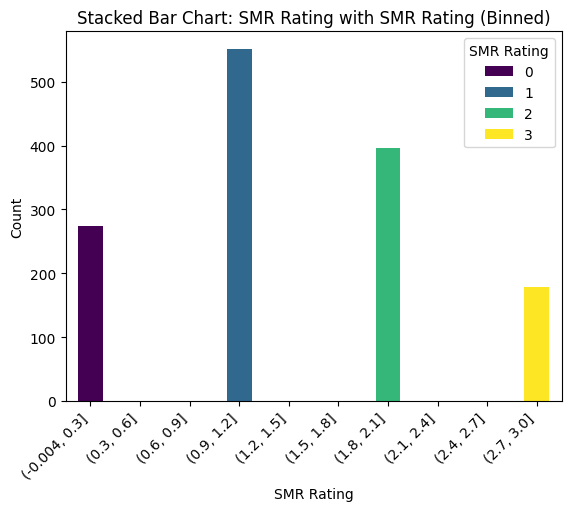

<Figure size 800x600 with 0 Axes>

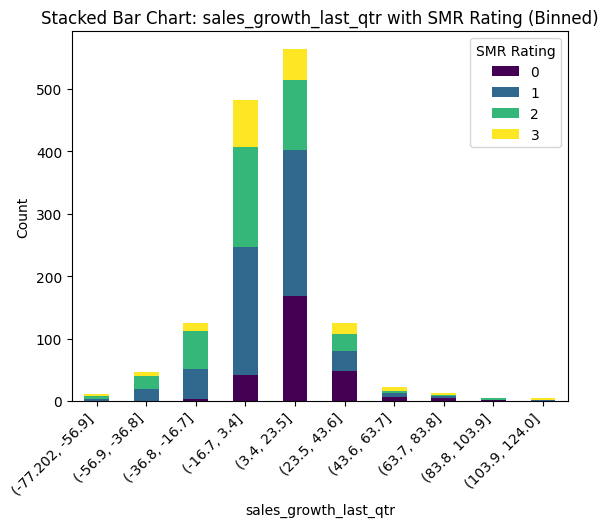

<Figure size 800x600 with 0 Axes>

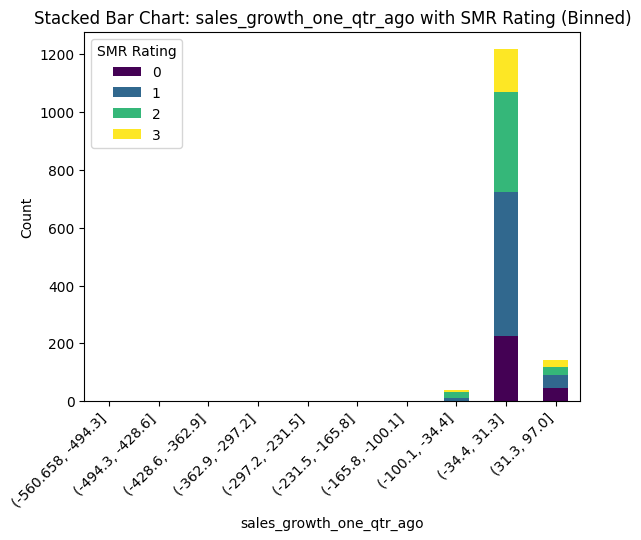

<Figure size 800x600 with 0 Axes>

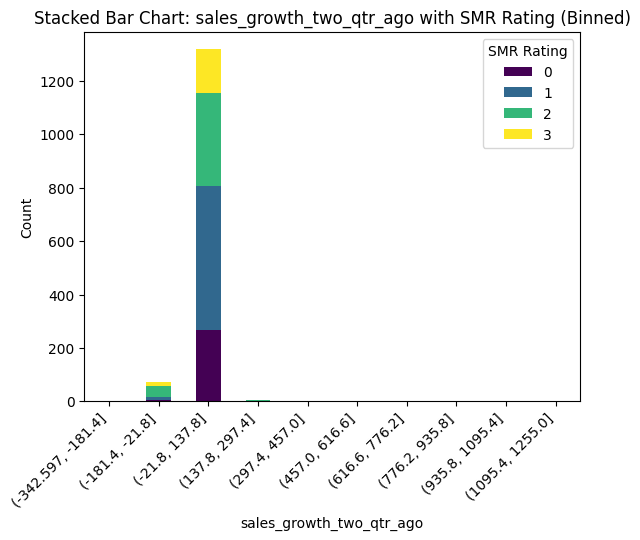

<Figure size 800x600 with 0 Axes>

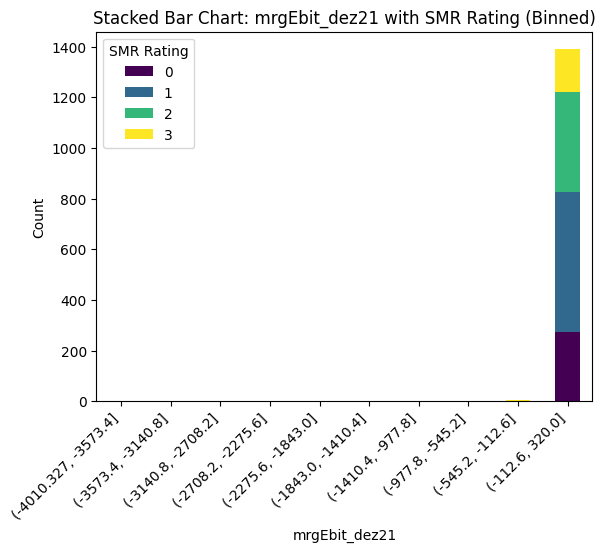

<Figure size 800x600 with 0 Axes>

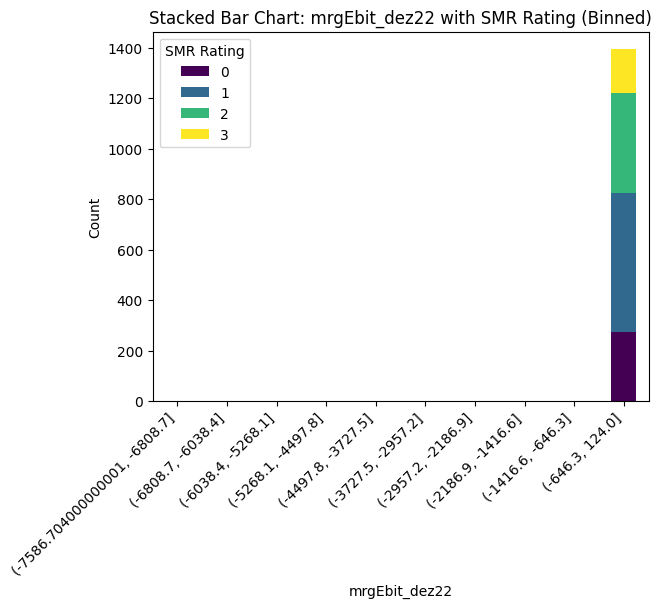

<Figure size 800x600 with 0 Axes>

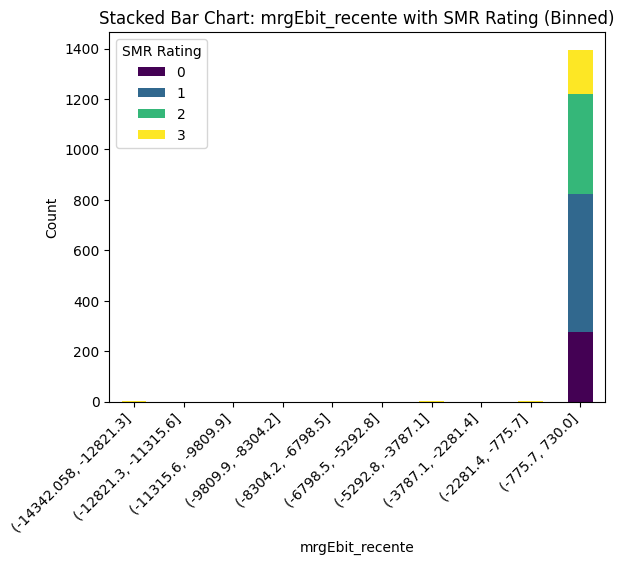

<Figure size 800x600 with 0 Axes>

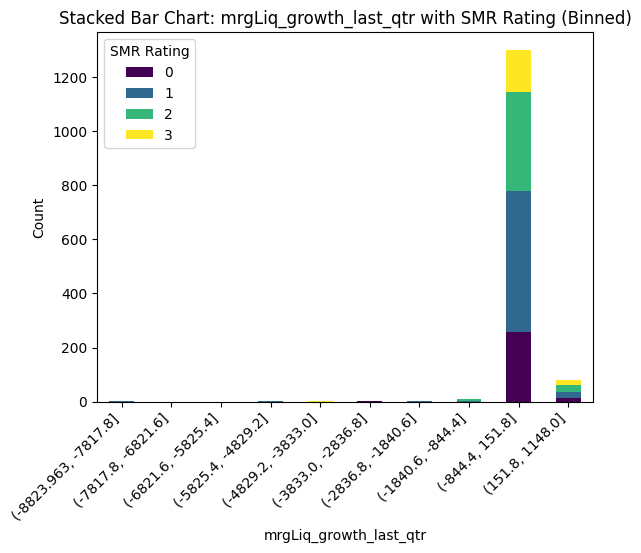

<Figure size 800x600 with 0 Axes>

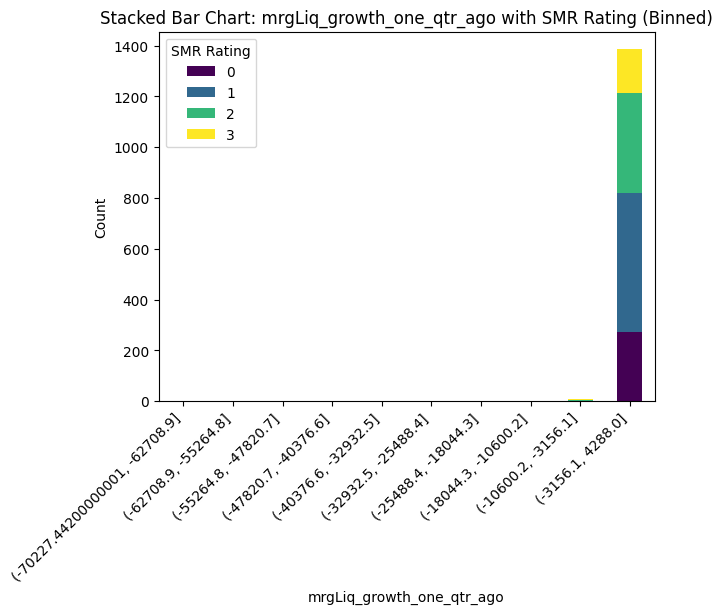

<Figure size 800x600 with 0 Axes>

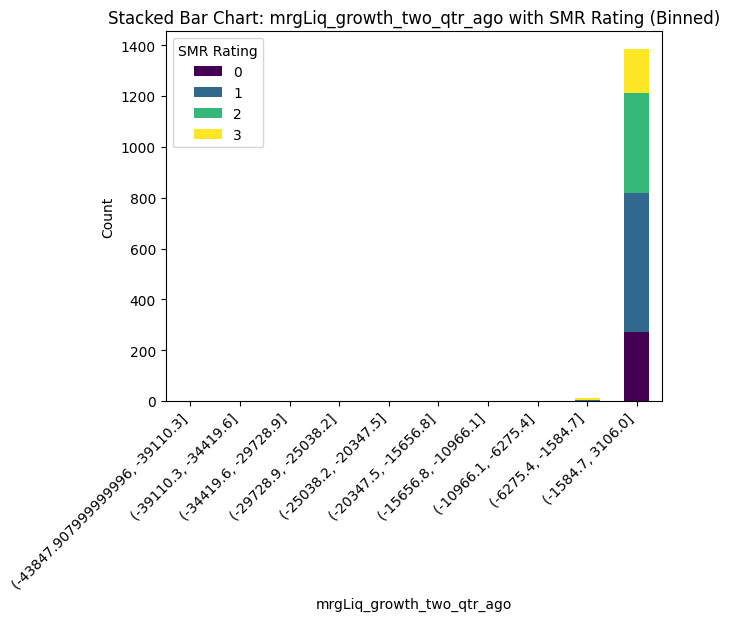

<Figure size 800x600 with 0 Axes>

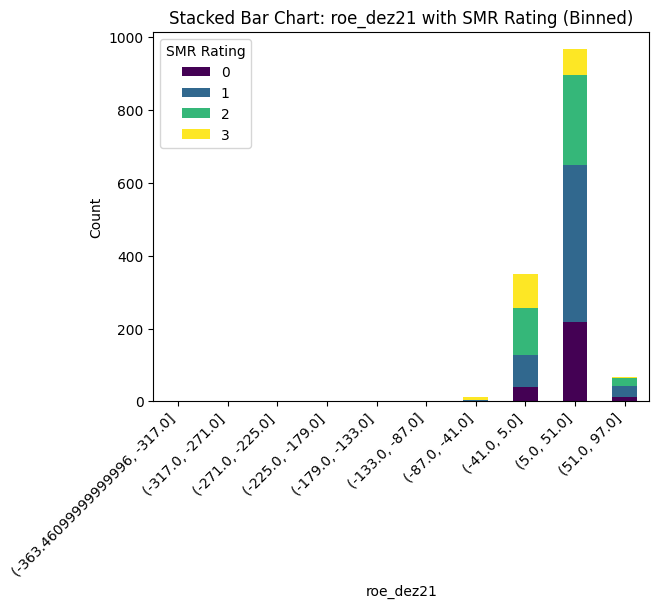

<Figure size 800x600 with 0 Axes>

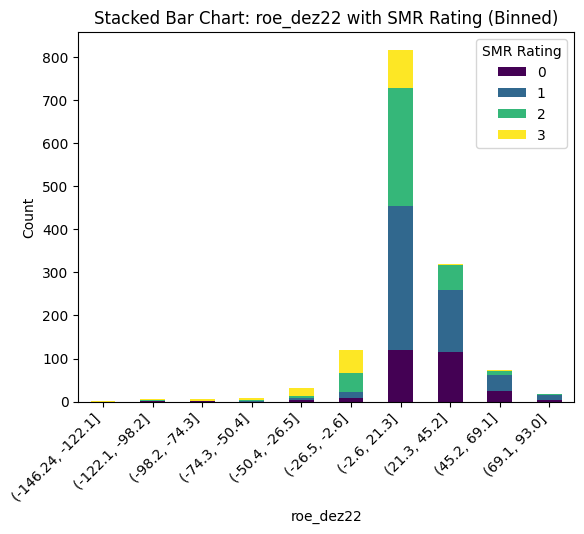

<Figure size 800x600 with 0 Axes>

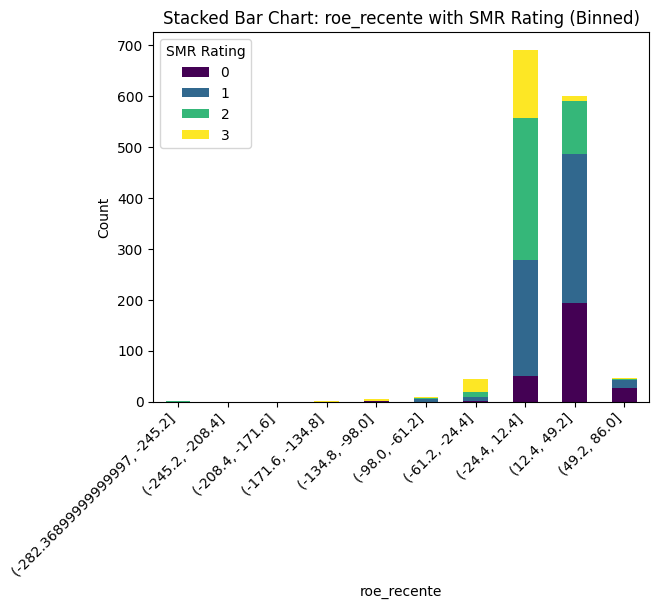

In [10]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Number of bins for each numerical column
num_bins = 10  # You can adjust the number of bins as needed

# Plot stacked bar charts for each numerical column with "SMR Rating" classification in bins
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True)
    stacked_data = df.groupby([bins, 'SMR Rating'])['SMR Rating'].count().unstack()
    stacked_data.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Stacked Bar Chart: {column} with SMR Rating (Binned)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='SMR Rating')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Feature Selection

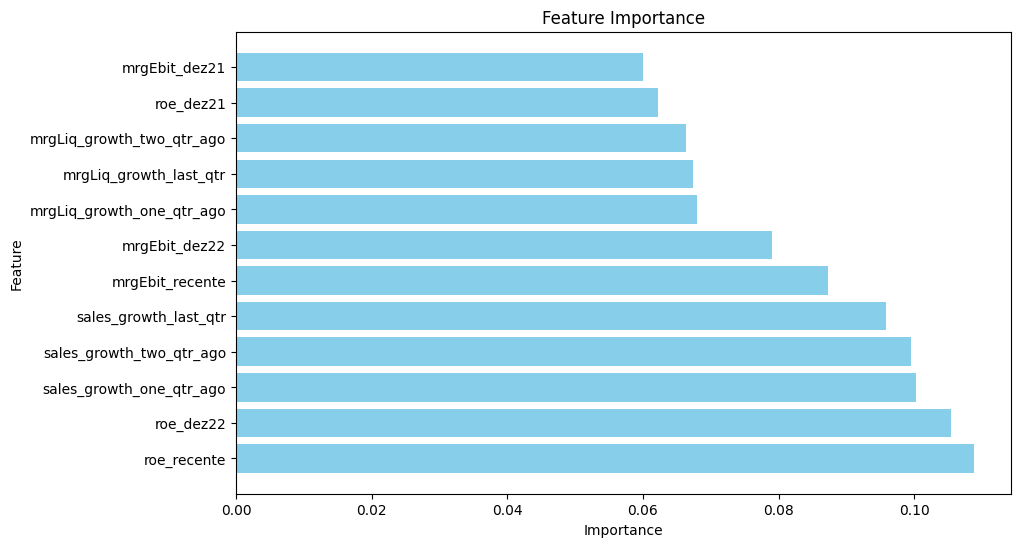

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'X' contains your features and 'y' contains your target variable 'SMR Rating Encoded'
X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Model

In [13]:
def y_transformer(x):
    # return y_transformer2(x)
    if x == "A":
        return 4
    elif x == "B":
        return 3
    elif x == "C":
        return 2
    elif x == "D":
        return 1
    elif x == "E":
        return 0
    else:
        raise ValueError(x)

def y_transformer2(x):
    if x == "B":
        return 1
    else:
        return 0


In [15]:

from sklearn.preprocessing import OneHotEncoder 
  

new_df = get_original_df()

new_df['SMR Rating'] = new_df['SMR Rating'].apply(lambda x: y_transformer(x))
new_df

,SMR Rating,sales_growth_last_qtr,sales_growth_one_qtr_ago,sales_growth_two_qtr_ago,mrgEbit_dez21,mrgEbit_dez22,mrgEbit_recente,mrgLiq_growth_last_qtr,mrgLiq_growth_one_qtr_ago,mrgLiq_growth_two_qtr_ago,roe_dez21,roe_dez22,roe_recente
0,4,6,5,1,21,16,14,-13,-20,-42,22,26,106
1,3,9,2,-8,12,13,13,-9,-60,-29,386,216,185
2,4,-1,8,1,25,34,37,134,-14,-16,108,949,917
3,3,-16,100,61,90,94,95,2,8,3,124,377,448
4,3,1,2,0,13,13,12,-81,5,43,230,273,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,2,25,29,30,-3,-15,-8,-50,90,1041,0,-24,-18
1542,2,38,50,42,-8,0,10,-187,62,-146,-6,0,13
1543,2,25,33,37,-53,-50,-33,-61,-52,-31,-21,-16,-11
1544,1,15,-5,-9,2,-4,-5,218,-5937,1019,1,-5,24


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import TweedieRegressor


m_df = df
m_df = df.copy()

m_df['SMR Rating'] = m_df['SMR Rating'].apply(lambda x: y_transformer(x))

X = m_df.drop(['SMR Rating'], axis=1)
y = m_df['SMR Rating']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for classifier in [GaussianNB(),
                   DecisionTreeClassifier(),
                   RandomForestClassifier(random_state=42),
                   LogisticRegression(random_state=42),
                   XGBClassifier(random_state=42),
                   SVC(probability=True, random_state=42),
                   KNeighborsClassifier(n_neighbors=5)]:


    print(classifier)
    
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = classifier.predict(X_test)


    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy:.2f}')

    # Print detailed classification report
    print(classification_report(y_test, predictions))

    print("===="*40)


GaussianNB()
Accuracy: 0.40
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.25      0.02      0.04        41
           2       0.38      0.18      0.24        90
           3       0.41      0.89      0.56       103
           4       0.40      0.04      0.08        47

    accuracy                           0.40       287
   macro avg       0.35      0.33      0.26       287
weighted avg       0.37      0.40      0.30       287

DecisionTreeClassifier()
Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.44      0.67      0.53         6
           1       0.40      0.39      0.40        41
           2       0.51      0.44      0.47        90
           3       0.60      0.65      0.62       103
           4       0.55      0.55      0.55        47

    accuracy                           0.53       287
   macro avg       0.50      0.54      0.52       287
weighted 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.41
              precision    recall  f1-score   support

           0       0.33      0.83      0.48         6
           1       0.62      0.20      0.30        41
           2       0.47      0.17      0.25        90
           3       0.46      0.76      0.58       103
           4       0.20      0.26      0.23        47

    accuracy                           0.41       287
   macro avg       0.42      0.44      0.36       287
weighted avg       0.44      0.41      0.37       287

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
            

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.